In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import seaborn as sns

In [90]:
!pip install folium

  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8


DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
You should consider upgrading via the 'c:\users\sky\anaconda3\python.exe -m pip install --upgrade pip' command.


In [127]:
time_df = pd.read_csv('DailyTemperatureDaejeon.csv')
space_df =gpd.read_file('DailyTemperatureStation.csv')
crs = {'init': 'epsg:4326'}

print(time_df.head())
print(space_df.head())

type(time_df)

         Date  Station  Daily temperature  Minimum  Maximum
0  2018-02-26      133                4.0     -4.2     13.0
1  2018-02-27      133                6.3     -1.9     13.1
2  2018-02-28      133                5.3      1.4      9.9
3  2018-03-01      133                2.0     -3.2      4.8
4  2018-03-02      133                1.1     -6.2      8.7
  Station             City     Location  Latitude  Longitude Altitude (m)  \
0      90           Sokcho      Gangwon  38.25085  128.56473        17.53   
1      95         Cheorwon      Gangwon  38.14787   127.3042       155.48   
2      98      Dongducheon  Gyeonggi-do  37.90188   127.0607       115.62   
3      99             Paju     Gyeonggi  37.88589  126.76648        30.59   
4     100    Daegwallyeong      Gangwon  37.67713  128.71834       772.43   

  geometry  
0     None  
1     None  
2     None  
3     None  
4     None  


pandas.core.frame.DataFrame

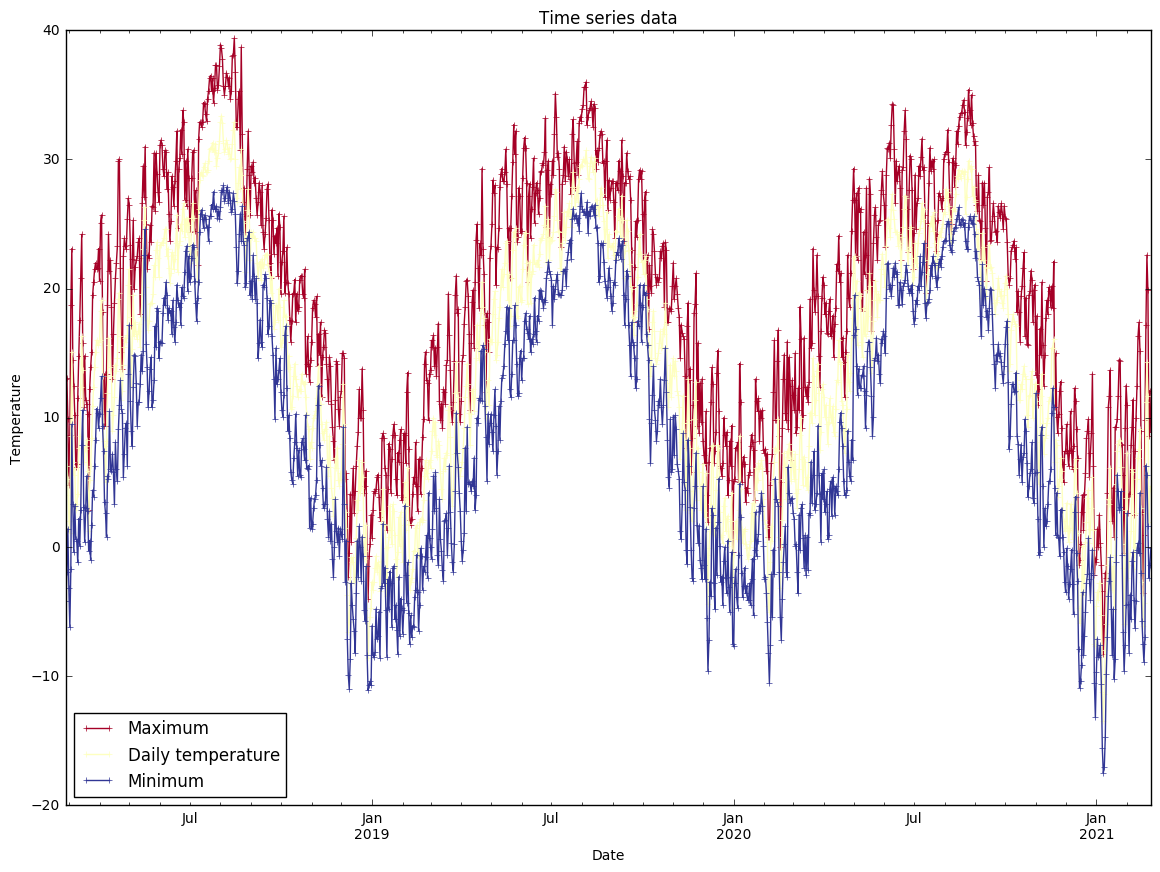

In [227]:
time_df.plot(x =  'Date', y = ['Maximum', 'Daily temperature', 'Minimum'], colormap = 'RdYlBu', figsize = (14, 10),marker = '+', markersize = 5)
xlab = 'Date'
ylab = 'Temperature'
title = 'Time series data'

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

plt.show()

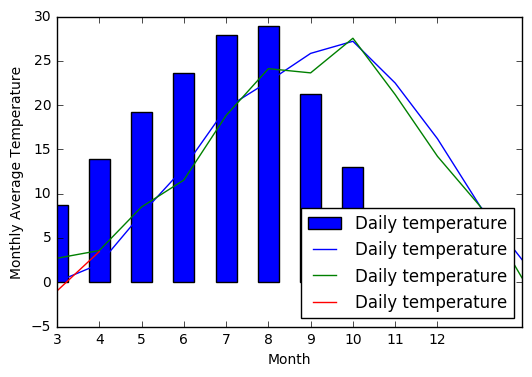

In [224]:
plt.close()
time_df['Date'] = pd.to_datetime(time_df['Date'])
time_df['Date']
time_df['Date'].max() - time_df['Date'].min()

years = time_df['Date'].dt.year.unique()

for i in years:
    globals()['time_{}_df'.format(i)] = time_df[time_df['Date'].dt.year == i]
    globals()['time_{}_df'.format(i)] = globals()['time_{}_df'.format(i)][['Date', 'Daily temperature', 'Minimum', 'Maximum']]
'''
for i in years:
    globals()['time_{}_df'.format(i)].groupby(globals()['time_{}_df'.format(i)]['Date'].dt.month).mean().plot()
'''

xlab = 'Month'
ylab = 'Monthly Average Temperature'
title = 'Annual graph'
time_2018_df['Daily temperature'].groupby(time_2018_df['Date'].dt.month).mean().plot(kind = 'bar', legend = "2018 Daily")
time_2019_df['Daily temperature'].groupby(time_2019_df['Date'].dt.month).mean().plot(legend = "2019 Daily")
time_2020_df['Daily temperature'].groupby(time_2020_df['Date'].dt.month).mean().plot(legend = "2019 Daily")
time_2021_df['Daily temperature'].groupby(time_2021_df['Date'].dt.month).mean().plot(legend = "2019 Daily")
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()

In [103]:
numeric_list = ['Latitude', 'Longitude', 'Altitude (m)']
for i in numeric_list:
    space_df[i] = space_df[i].astype(float)

geometry = [Point(xy) for xy in zip(space_df["Longitude"], space_df["Latitude"])]
geometry[:5]
new_space_df = gpd.GeoDataFrame(space_df, crs = crs, geometry = geometry)
new_space_df.head()

new_space_df['Altitude (m)'].unique()
max(new_space_df['Altitude (m)'])
5//2

C:\Users\sky\Anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2

0    0.0
1    1.0
2    1.0
3    0.0
4    7.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: alti_cate, dtype: float64


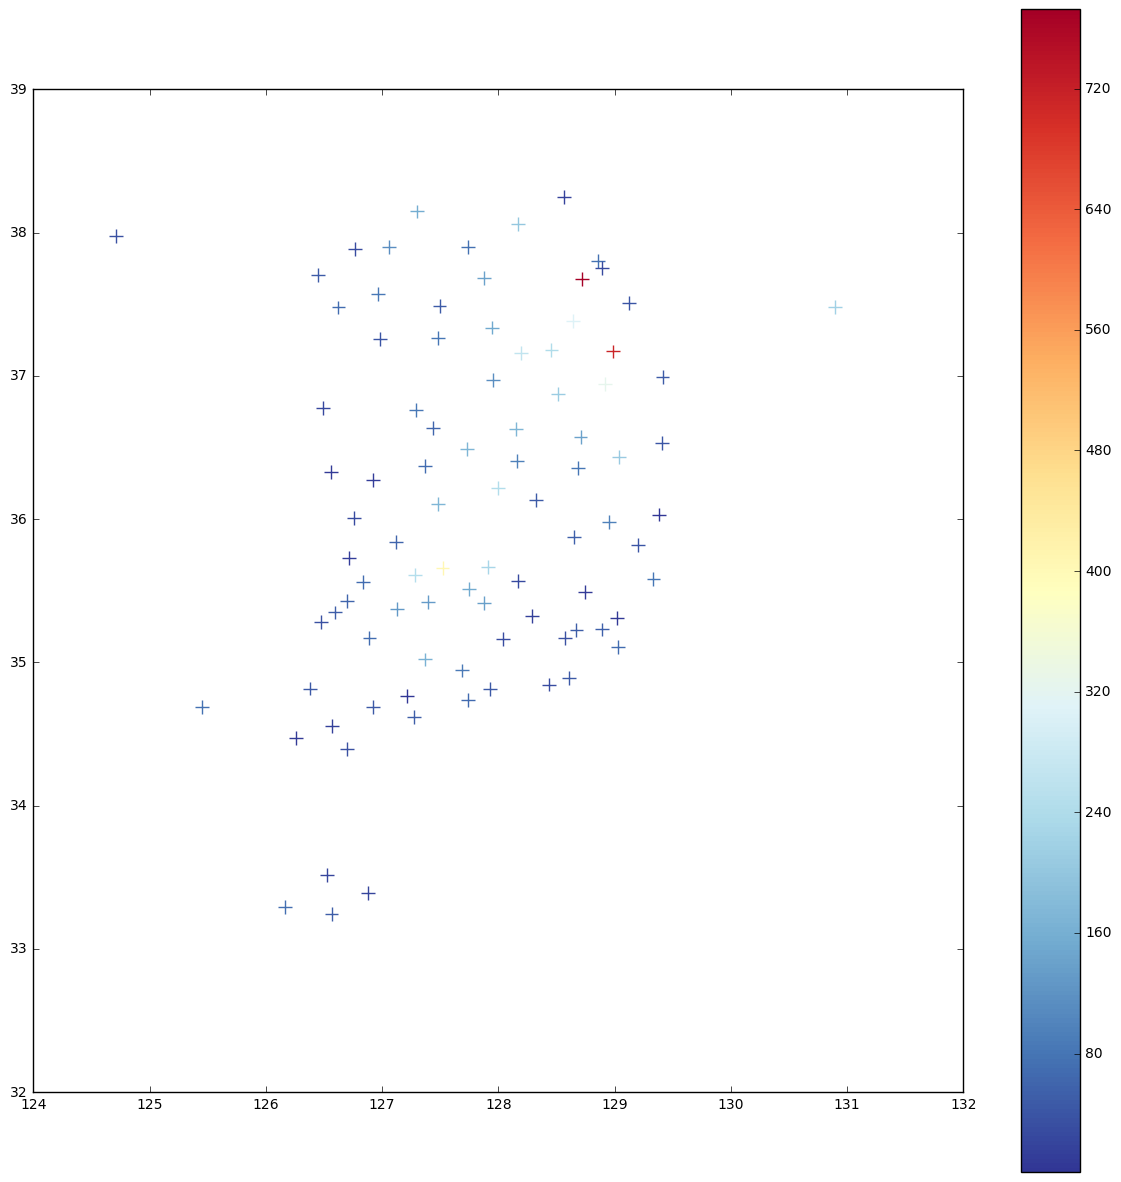

In [92]:
plt.close()

interval = 100
new_space_df['alti_cate'] = new_space_df["Altitude (m)"]//interval

print(new_space_df['alti_cate'][:10])
max(new_space_df['alti_cate'])

#colors = {0: 'black', 1:'blue', 2:'skyblue', 3:'green', 4:'green', 5:'yellow', 6:'orange', 7:'red'}


#fig, ax = plt.subplots(figsize = (15, 15))
#new_space_df.plot(ax = ax, alpha = 0.4, color = "grey")
colormap = "RdYlBu_r"
ax.grid()
fig, ax = plt.subplots(figsize = (15, 15))
new_space_df.plot(column = 'Altitude (m)',ax = ax, markersize = 100, cmap = colormap, marker = '+', legend = True)

#plt.close()
plt.show()

In [110]:
import folium
state_geo = 'http://geoportal1-ons.opendata.arcgis.com/datasets/01fd6b2d7600446d8af768005992f76a_4.geojson'

new_space_df['geometry_2'] = new_space_df['geometry'].buffer(0.05)
new_space_df.to_crs('epsg:4326')

C:\Users\sky\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



,Station,City,Location,Latitude,Longitude,Altitude (m),geometry,alti_cate,geometry_2
0,90,Sokcho,Gangwon,38.25085,128.56473,17.53,POINT (128.56473 38.25085),0.0,"POLYGON ((128.61473 38.25085, 128.61449 38.245..."
1,95,Cheorwon,Gangwon,38.14787,127.30420,155.48,POINT (127.30420 38.14787),1.0,"POLYGON ((127.35420 38.14787, 127.35396 38.142..."
2,98,Dongducheon,Gyeonggi-do,37.90188,127.06070,115.62,POINT (127.06070 37.90188),1.0,"POLYGON ((127.11070 37.90188, 127.11046 37.896..."
3,99,Paju,Gyeonggi,37.88589,126.76648,30.59,POINT (126.76648 37.88589),0.0,"POLYGON ((126.81648 37.88589, 126.81624 37.880..."
4,100,Daegwallyeong,Gangwon,37.67713,128.71834,772.43,POINT (128.71834 37.67713),7.0,"POLYGON ((128.76834 37.67713, 128.76810 37.672..."
5,101,ChunCheon,Gangwon,37.90262,127.73570,75.82,POINT (127.73570 37.90262),0.0,"POLYGON ((127.78570 37.90262, 127.78546 37.897..."
6,102,Baengnyeongdo,Incheon,37.97396,124.71237,36.00,POINT (124.71237 37.97396),0.0,"POLYGON ((124.76237 37.97396, 124.76213 37.969..."
7,104,Bukgangneung,Gangwon,37.80456,128.85535,75.24,POINT (128.85535 37.80456),0.0,"POLYGON ((128.90535 37.80456, 128.90511 37.799..."
8,105,Gangneung,Gangwon,37.75147,128.89099,27.12,POINT (128.89099 37.75147),0.0,"POLYGON ((128.94099 37.75147, 128.94075 37.746..."
9,106,East Sea,Gangwon,37.50709,129.12433,40.46,POINT (129.12433 37.50709),0.0,"POLYGON ((129.17433 37.50709, 129.17409 37.502..."


In [143]:
m = folium.Map(location=[new_space_df.geometry.iloc[0].y, new_space_df.geometry.iloc[0].x], zoom_start=7)
#folium.GeoJson(new_space_df[['geometry_2','Altitude (m)']].to_json(),
#             style_function = lambda feature: {
#        'height' : new_space_df['Altitude (m)']
#    }).add_to(m)
#visual_df = new_space_df['geometry_2']
#visual_df = visual_df.merge(new_space_df['Altitude (m)'])
folium.GeoJson(new_space_df['geometry_2'].to_json()).add_to(m)
#print(visual_df.head())
#folium.GeoJson(visual_df.to_json()).add_to(m)
#folium.GeoJson(visual_df.to_json(), style_function = lambda feature: {'height' : visual_df['Altitude (m)']}).add_to(m)
m